
# Project:(TMDb Movie Data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


**In this section of report** :
>i will be analyzing data asscociated with the most popular movies from **(TMDb)** 
>
**At the end i want to know :**
>
>1-Which genres are most popular from year to year?
>
>2-What kinds of properties are associated with movies that have high revenues?


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>**In this section of the report,I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.**



## load my dataset

In [54]:
 df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**i make a function to calucate the info of a dataframe**

In [55]:
def info_dataset(df):
    df.info()

## i try to know more about my dataset (knowing the types of each column and how many null values)

In [56]:
info_dataset(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning Section
>**first:**  i see what columns that have null values
>
>**second:** i delete the columns that not serve my research
>
>**third:** i see if there are any duplicated rows in the dataset if yes ,i clear them
>


**i see what columns that have null values**

In [57]:
df.drop(['id','imdb_id','keywords','tagline','production_companies','homepage','director','overview','release_date','cast'],axis=1,inplace=True)

In [58]:
info_dataset(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


**i delete the columns that not serve my research**

In [59]:
# Delete all 'null' Values
df.dropna(inplace=True)

** i make sure that there are no null values**

In [60]:
info_dataset(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10843 non-null  float64
 1   budget          10843 non-null  int64  
 2   revenue         10843 non-null  int64  
 3   original_title  10843 non-null  object 
 4   runtime         10843 non-null  int64  
 5   genres          10843 non-null  object 
 6   vote_count      10843 non-null  int64  
 7   vote_average    10843 non-null  float64
 8   release_year    10843 non-null  int64  
 9   budget_adj      10843 non-null  float64
 10  revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1016.5+ KB


**it's time to see if there are any duplicated values**

In [61]:
#Delete Duplicate Rows
sum(df.duplicated())

1

**so , i delete the duplicated the rows**

In [62]:
df.drop_duplicates(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

In [63]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>**this step  is just for knowing the number of classifications of movies**
>
>so i make new column (genres_no) 

In [64]:
li_genres=[]
for c in df['genres']:
    #print(c)
    li_genres.append(c.split('|'))
#li_genres
li_genres_no=[]
for index in li_genres:
    li_genres_no.append(len(index))
df['genres_no']=li_genres_no
df.head() 

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_no
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,4
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,4
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,4
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,3


In [65]:
movie_genre=set()
for index in li_genres:
    for c in index:
        #print(c)
        movie_genre.add(c)
movie_genre
movie_genre=list(movie_genre)
movie_genre

['Horror',
 'Family',
 'History',
 'Mystery',
 'Western',
 'Music',
 'War',
 'Romance',
 'Science Fiction',
 'Drama',
 'Fantasy',
 'TV Movie',
 'Action',
 'Crime',
 'Comedy',
 'Foreign',
 'Animation',
 'Thriller',
 'Documentary',
 'Adventure']

## i try to plot a popularity histogram

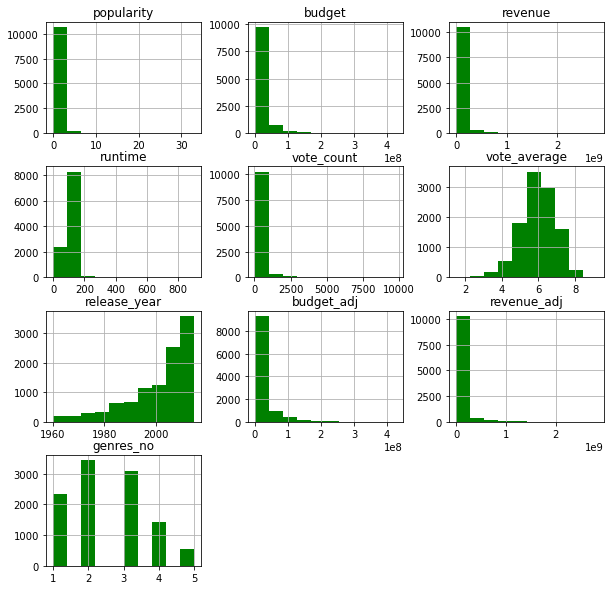

In [66]:
df.hist(figsize=(10,10),color='green');

## i try to find relation between popularity & years

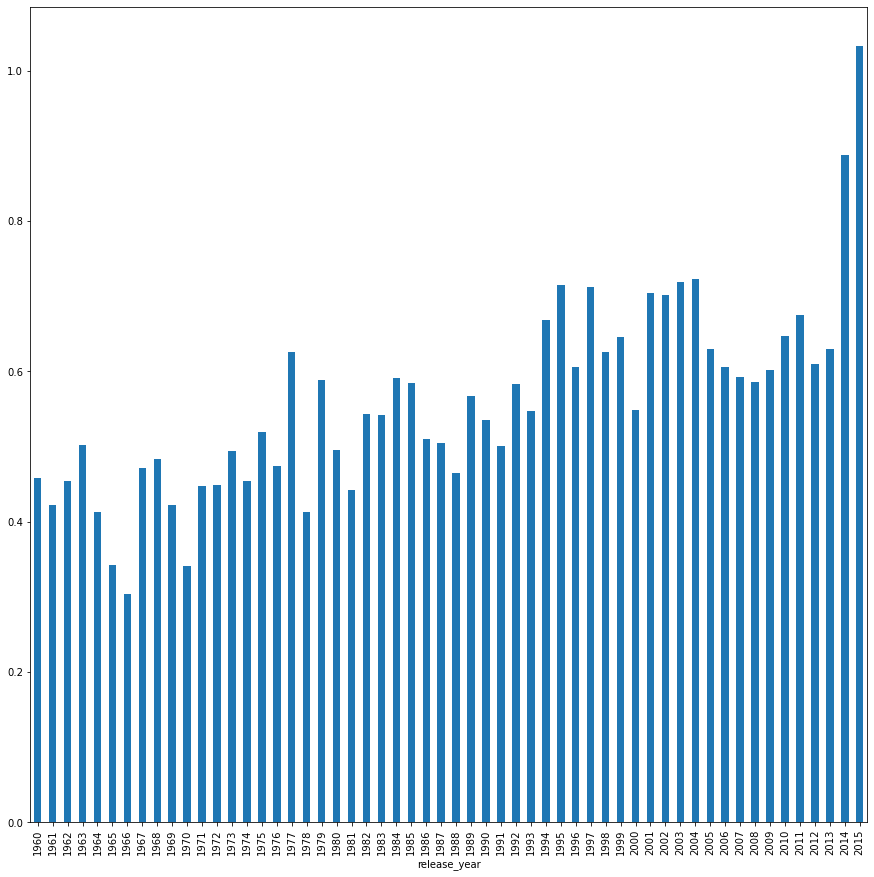

In [67]:
df.groupby(['release_year']).popularity.mean().plot(kind='bar',figsize=(15,15));

**i split the genre column and but it in a new dataframe**

In [68]:
df_genre=df['genres'].str.split('|', expand=True)

In [69]:
df_genre['release_year']=df['release_year']

In [70]:
df_genre['popularity']=df['popularity']

In [71]:
df_genre

,0,1,2,3,4,release_year,popularity
0,Action,Adventure,Science Fiction,Thriller,None,2015,32.985763
1,Action,Adventure,Science Fiction,Thriller,None,2015,28.419936
2,Adventure,Science Fiction,Thriller,None,None,2015,13.112507
3,Action,Adventure,Science Fiction,Fantasy,None,2015,11.173104
4,Action,Crime,Thriller,None,None,2015,9.335014
...,...,...,...,...,...,...,...
10861,Documentary,None,None,None,None,1966,0.080598
10862,Action,Adventure,Drama,None,None,1966,0.065543
10863,Mystery,Comedy,None,None,None,1966,0.065141
10864,Action,Comedy,None,None,None,1966,0.064317


**here ,i just renamed the columns**

In [72]:

df_genre.columns=['first','sec','trd','forth','fifth','release_year','popularity']

In [73]:
df_genre

,first,sec,trd,forth,fifth,release_year,popularity
0,Action,Adventure,Science Fiction,Thriller,None,2015,32.985763
1,Action,Adventure,Science Fiction,Thriller,None,2015,28.419936
2,Adventure,Science Fiction,Thriller,None,None,2015,13.112507
3,Action,Adventure,Science Fiction,Fantasy,None,2015,11.173104
4,Action,Crime,Thriller,None,None,2015,9.335014
...,...,...,...,...,...,...,...
10861,Documentary,None,None,None,None,1966,0.080598
10862,Action,Adventure,Drama,None,None,1966,0.065543
10863,Mystery,Comedy,None,None,None,1966,0.065141
10864,Action,Comedy,None,None,None,1966,0.064317


## In the next section I  try to make dictionary with two pair keys and one value: 
>
### the first key is the film genre and the second key is the released  year 
>
### a value which is the count of the film genre in that year 

In [74]:
years=df['release_year'].unique()
years=list(years)
dic_year={}

for movie in movie_genre:
    for year in years:
        genre=df_genre[(df_genre['release_year']==year) & ((df_genre['first'] == movie)  | (df_genre['sec'] ==movie) | (df_genre['trd'] ==movie) | (df_genre['forth'] ==movie)  | (df_genre['fifth'] ==movie))]
        genre_2=genre['release_year'].count().sum()
        dic_year[(movie,year)]=(genre.count().sum()-genre_2)
        #dic[movie]=dic_year


## I try to store the keys and value of dictionary in  3 different lists

In [75]:
li_01=[]
li_02=[]
for (key0,key1), value in dic_year.items():
    li_02=[]
    li_02.append(key0)
    li_02.append(key1)
    li_02.append(value)
    li_01.append(li_02)


In [76]:
values=[]
indices=[]
keys=[]
for x in range(len(li_01)):
    values.append(li_01[x][2])
    indices.append(li_01[x][1])
    keys.append(li_01[x][0])
df_try=pd.DataFrame(values)

In [78]:
the_year=[]
for index in range (56):
    the_year.append(indices[index])
genre_lis=[]
for index in range (0,1120,56):
    genre_lis.append(keys[index])    

**i have to make this because i want to 20 list and each list contanin the number of the specific genres through all years**

In [79]:
li1=[]
li2=[]
li3=[]
li4=[]
li5=[]
li6=[]
li7=[]
li8=[]
li9=[]
li10=[]
li11=[]
li12=[]
li13=[]
li14=[]
li15=[]
li16=[]
li17=[]
li18=[]
li19=[]
li20=[]

index=0
for index in range (0,56):
    li1.append(values[index])
for index in range (56,56*2):
    li2.append(values[index])
for index in range (56*2,56*3):
    li3.append(values[index])
for index in range (56*3,56*4):
    li4.append(values[index])
for index in range (56*4,56*5):
    li5.append(values[index])
for index in range (56*5,56*6):
    li6.append(values[index])
for index in range (56*6,56*7):
    li7.append(values[index])
for index in range (56*7,56*8):
    li8.append(values[index])
for index in range (56*8,56*9):
    li9.append(values[index])
for index in range (56*9,56*10):
    li10.append(values[index])
for index in range (56*10,56*11):
    li11.append(values[index])
for index in range (56*11,56*12):
    li12.append(values[index])
for index in range (56*12,56*13):
    li13.append(values[index])
for index in range (56*13,56*14):
    li14.append(values[index])
for index in range (56*14,56*15):
    li15.append(values[index])
for index in range (56*15,56*16):
    li16.append(values[index])
for index in range (56*16,56*17):
    li17.append(values[index])
for index in range (56*17,56*18):
    li18.append(values[index])
for index in range (56*18,56*19):
    li19.append(values[index])
for index in range (56*19,56*20):
    li20.append(values[index])
genre_lis.append('year')
items=pd.DataFrame(np.column_stack([li1,li2,li3,li4,li5,li6,li7,li8,li9,li10,li11,li12,li13,li14,li15,li16,li17,li18,li19,li20,the_year]),index=the_year)
items.columns=genre_lis
items


,Horror,Family,History,Mystery,Western,Music,War,Romance,Science Fiction,Drama,...,TV Movie,Action,Crime,Comedy,Foreign,Animation,Thriller,Documentary,Adventure,year
2015,408,192,59,184,25,125,34,213,353,870,...,74,427,214,547,0,166,633,140,300,2015
2014,331,181,59,160,20,98,88,312,244,943,...,57,512,268,601,0,156,648,179,278,2014
1977,47,35,17,18,2,10,17,17,40,94,...,0,66,10,40,0,21,52,2,68,1977
2009,328,267,62,217,0,68,46,312,329,839,...,40,493,233,687,74,210,668,64,342,2009
2010,301,230,59,147,27,35,26,325,197,775,...,37,479,220,610,56,203,563,83,274,2010
1999,107,122,27,105,14,20,15,157,133,405,...,26,178,126,353,18,56,224,14,103,1999
2001,92,134,53,102,8,23,54,218,112,383,...,50,278,167,381,14,76,285,11,201,2001
2008,286,231,99,128,8,77,79,315,232,860,...,25,426,265,601,81,137,525,65,297,2008
2011,262,297,31,160,15,62,40,276,229,747,...,41,488,213,618,58,195,578,134,274,2011
2002,115,171,35,125,6,19,28,188,129,508,...,15,322,178,394,42,86,362,26,214,2002


## and finally here is the dataframe i was trying to make it in my first submission

In [80]:
items['year']=items['year'].astype(str)

## so i will plot the data in year 2015 for example

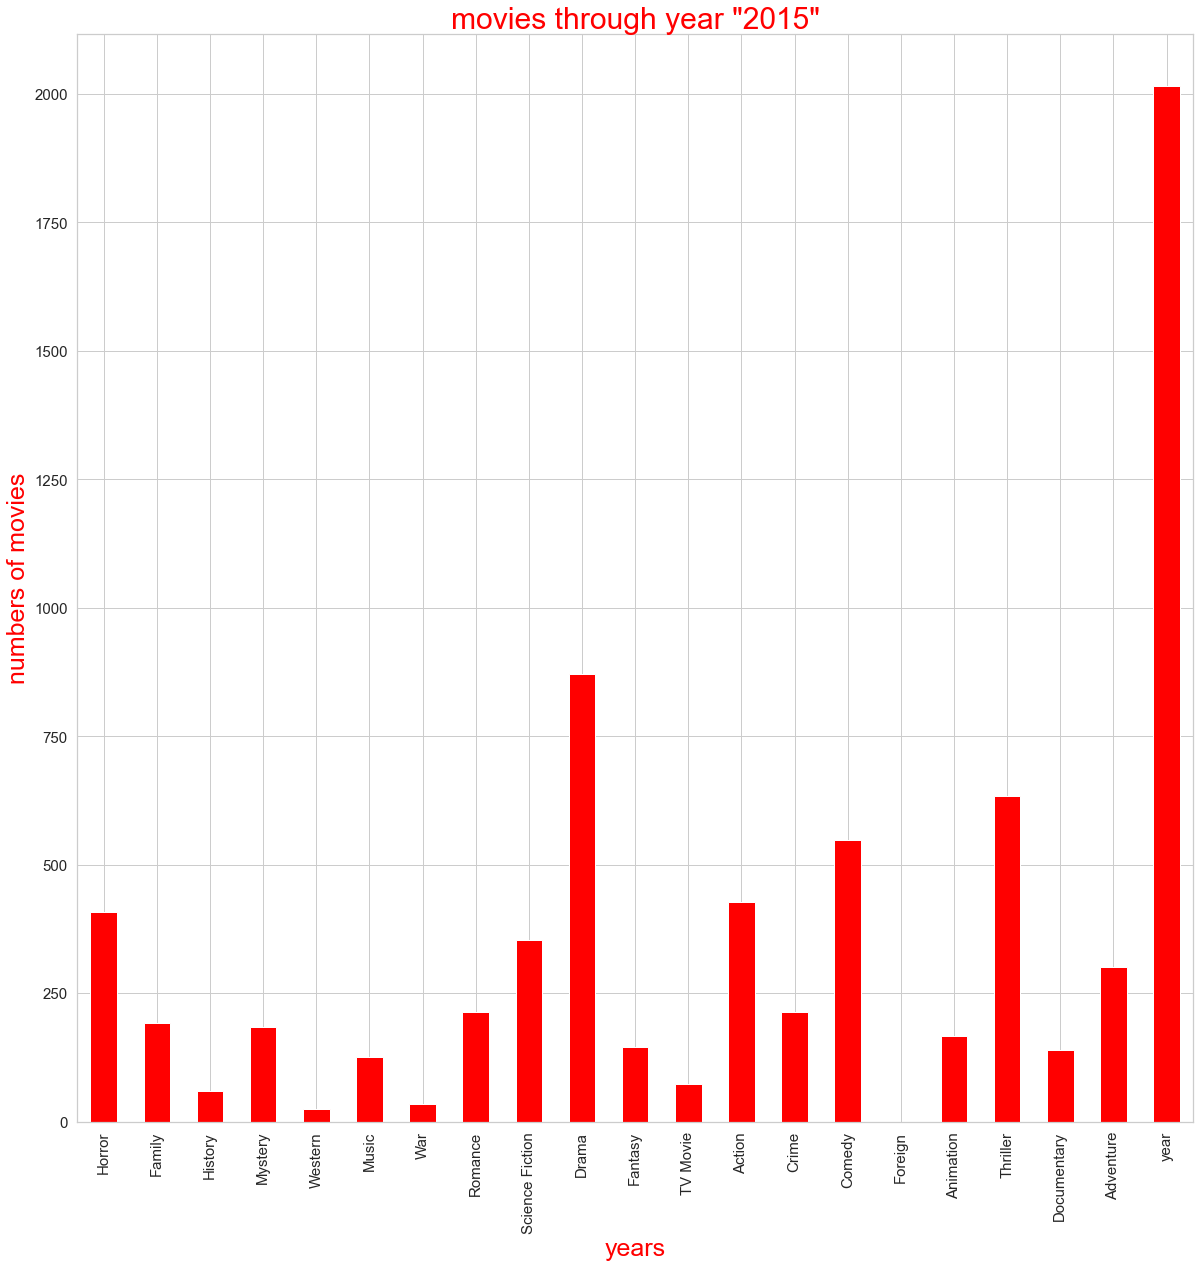

In [88]:
items.query('year=="2015"').mean().plot(kind='bar',figsize=(20,20),color='red',fontsize=15);
plt.xlabel('years',fontsize=25,color='red');
plt.ylabel('numbers of movies',fontsize=25,color='red')
plt.title('movies through year "2015"', fontsize=30,color='red');
sns.set_theme(style="whitegrid");

Text(0, 0.5, 'numbers of movies')

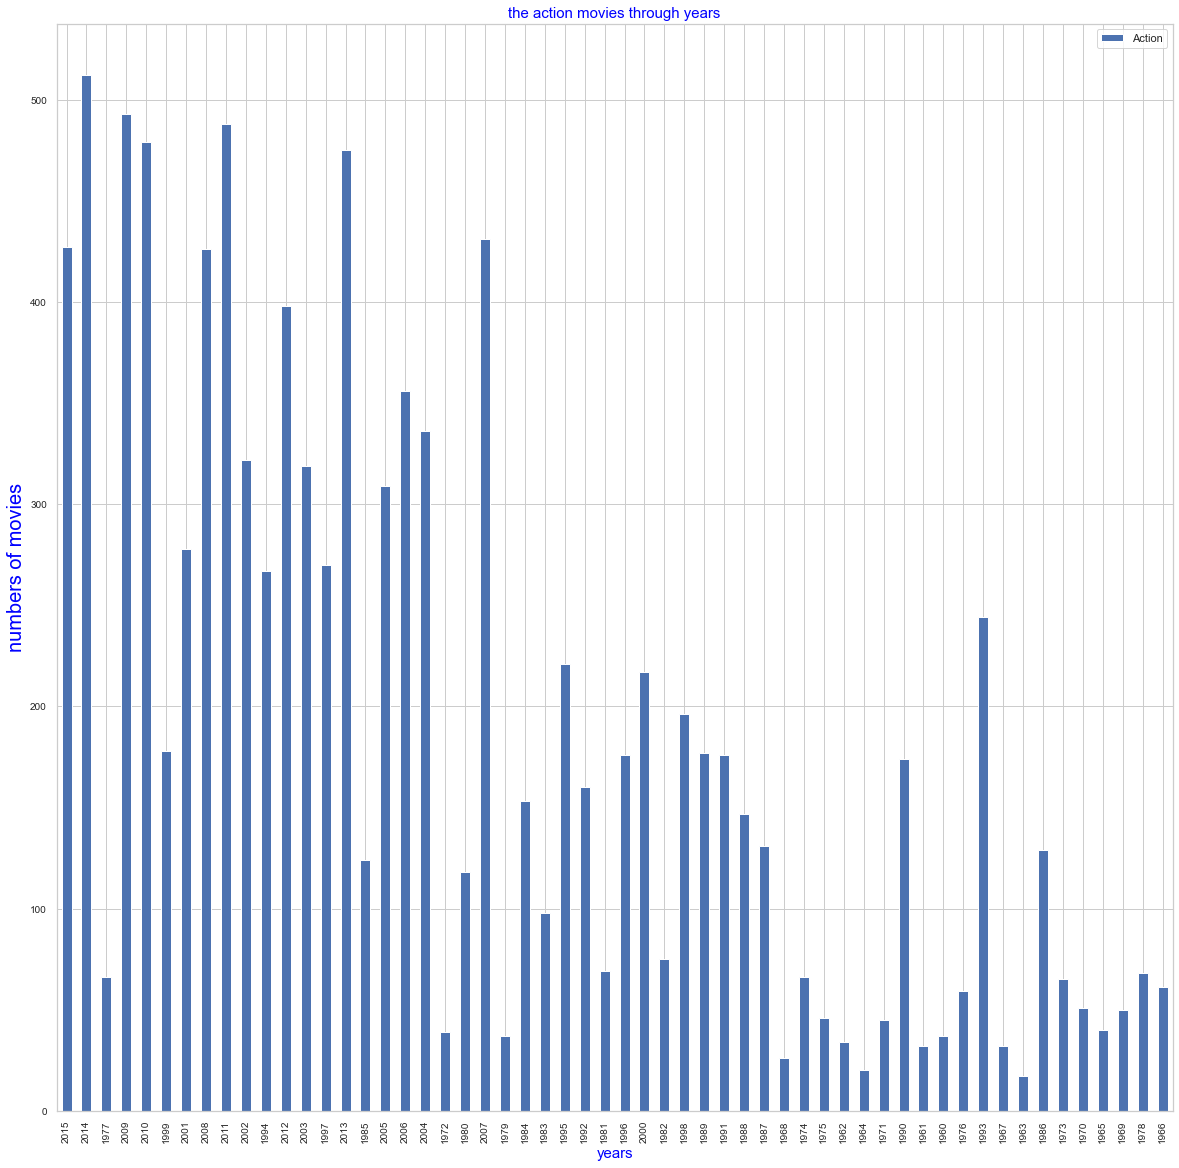

In [90]:
items['Action'].plot(kind='bar',figsize=(20,20),fontsize=10);
plt.title('the action movies through years',fontsize=15,color='blue');
plt.legend();
plt.xlabel('years',fontsize=15,color='blue')
plt.ylabel('numbers of movies',fontsize=20,color='blue')

<a id='eda'></a>
## Research(2)

### What kinds of properties are associated with movies that have high revenues?


In [91]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_no
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07,2.486165
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08,1.115439
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,2.000000
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,2.000000
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07,3.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,5.000000


**i divide the column budget to low_budget &high budget**
>from minimum value of budget to the mean is classified as low budget 
>
> from mean value of the budget to the maximum is classified as high budget 
>

In [92]:
#from 0 to mean is low budjet 
# from mean to maximum is high budget
budget_edges=[0,1.465531e+07,4.250000e+08]
budget_names=['low_budget','high_budget']

In [93]:
df['budget_levels']=pd.cut(df['budget'],budget_edges,labels=budget_names)

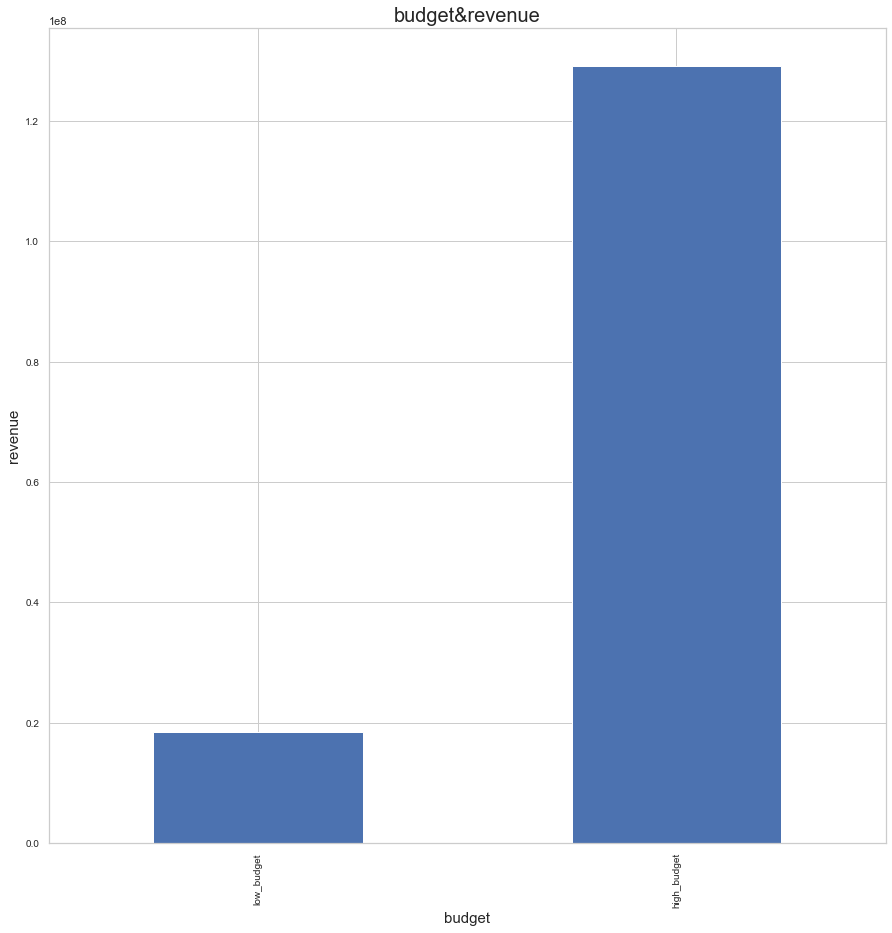

In [94]:

df.groupby('budget_levels')['revenue'].mean().plot(kind='bar',figsize=(15,15),fontsize=10);
sns.set_theme(style="whitegrid");
plt.xlabel('budget',fontsize=15);
plt.ylabel('revenue',fontsize=15);
plt.title('budget&revenue',fontsize=20);


**i divide the column "vote_average" to low_rating &medium_rating&moderately_high_rating&high_rating**
>from minimum value of vote_average to 25% is classified as low_rating 
>
> from 25% of the vote_average to 50% is classified as medium_rating 
>
>from 50% of vote_average to 75% is classified as moderately_high_rating 
>
> from 75% of the vote_average to max value is classified as high_rating 
>

In [95]:
votes_edges=[1.500000,5.400000,6.000000,6.600000,9.200000]
votes_names=['low_rating','medium_rating','moderately_high_rating','high_rating']

In [96]:
df['rating_levels']=pd.cut(df['vote_average'],votes_edges,labels=votes_names)

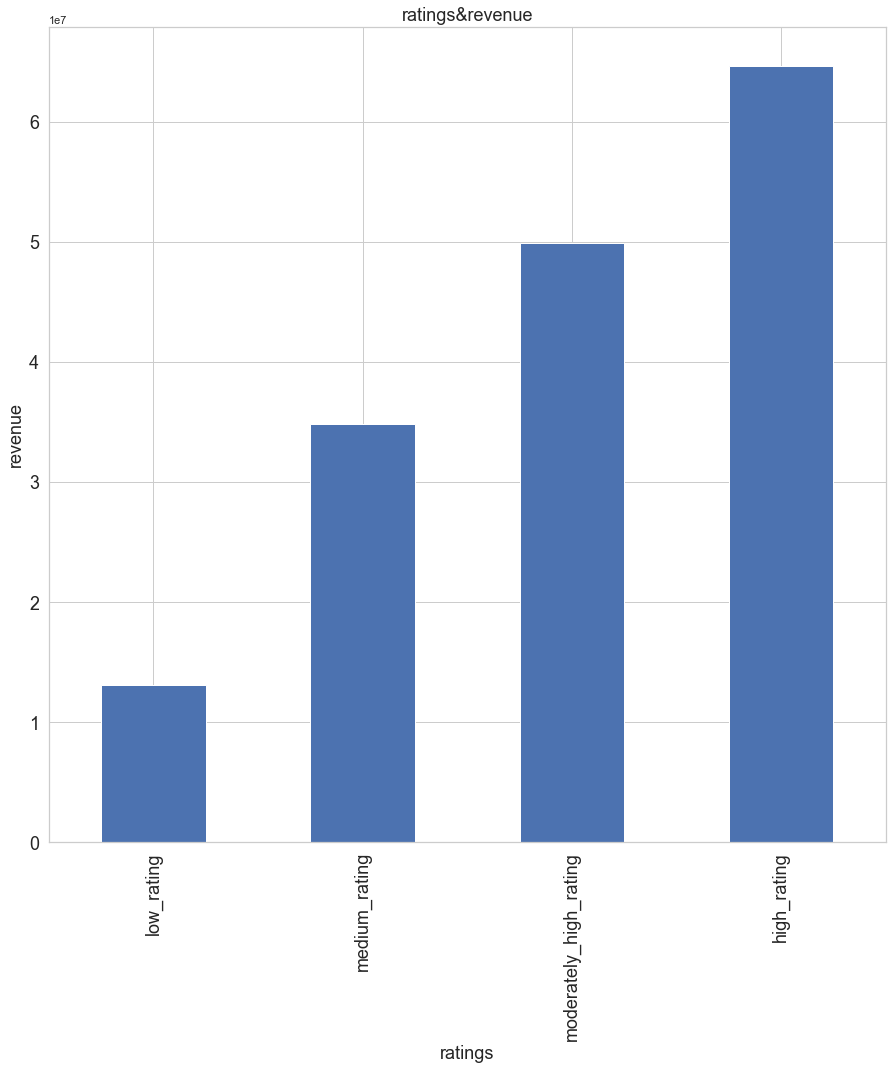

In [97]:
df.groupby('rating_levels')['revenue'].mean().plot(kind='bar',figsize=(15,15),fontsize=18);
sns.set_theme(style="whitegrid");
plt.xlabel('ratings',fontsize=18);
plt.ylabel('revenue',fontsize=18);
plt.title('ratings&revenue',fontsize=18);

**i make the same classification of budget here , the differnce i take the values from the vudget_adj column**
>i just want to make comparison between budjet &the budjet_adj
>

In [98]:
budget_adj_edges=[0,1.758712e+07,4.250000e+08]
budget_adj_names=['low_budget_adj','high_budget_adj']

In [99]:
df['budget_adj_levels']=pd.cut(df['budget_adj'],budget_adj_edges,labels=budget_adj_names)

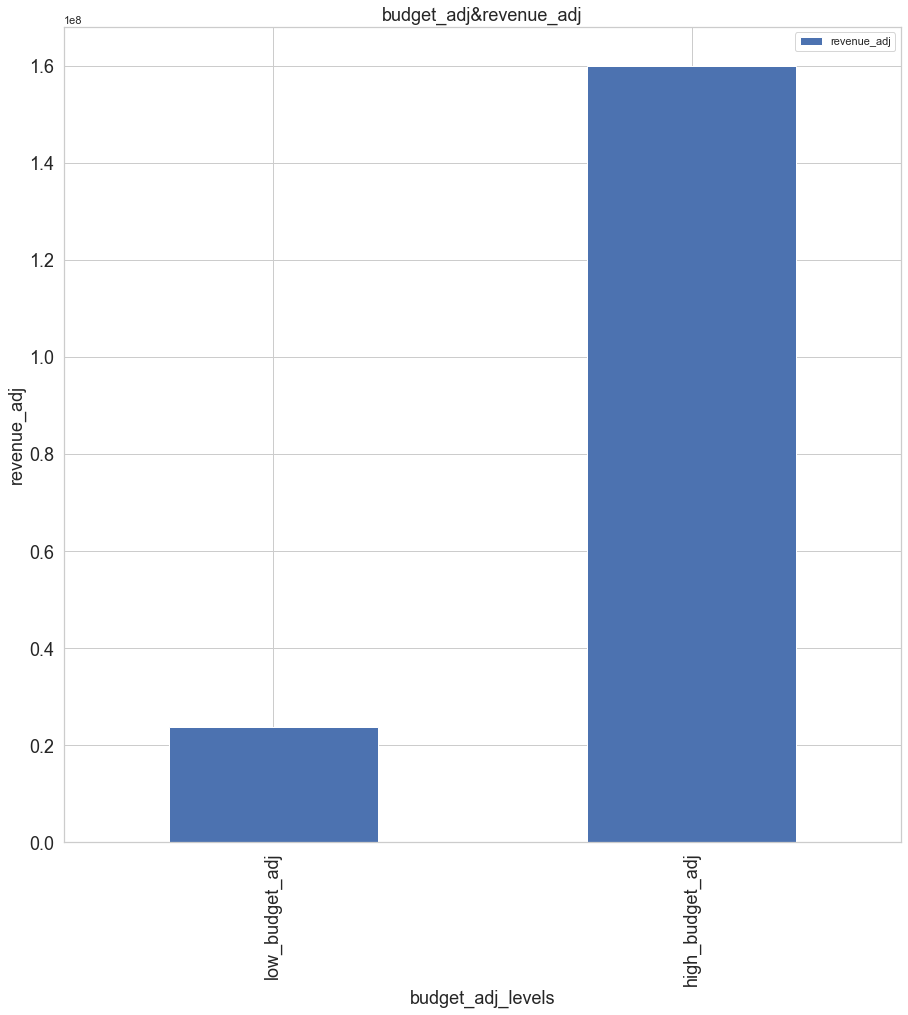

In [100]:

df.groupby('budget_adj_levels')['revenue_adj'].mean().plot(kind='bar',figsize=(15,15),fontsize=18);
sns.set_theme(style="whitegrid");
plt.xlabel('budget_adj_levels',fontsize=18);
plt.ylabel('revenue_adj',fontsize=18);
plt.title('budget_adj&revenue_adj',fontsize=18);
plt.legend();

**i make  a relation between how the movies that contain the more genres , gets more revenue**

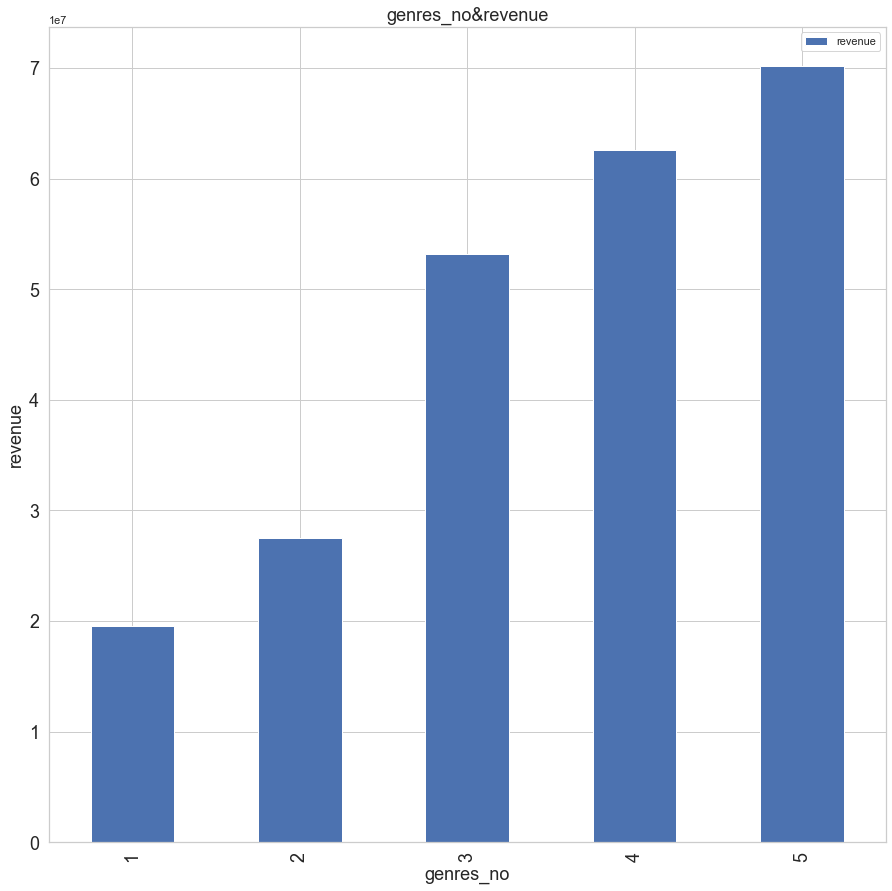

In [101]:
#remember i make a column contains generes numbers (genres_no)
df.groupby('genres_no')['revenue'].mean().plot(kind='bar',figsize=(15,15),fontsize=18);
sns.set_theme(style="whitegrid");
plt.xlabel('genres_no',fontsize=18);
plt.ylabel('revenue',fontsize=18);
plt.title('genres_no&revenue',fontsize=18);
plt.legend();

**i divide the column "popularity" to not_popular & low_popular & popular &very_popular**
>from minimum value of popularity to 25% is classified as not_popular
>
> from 25% of the popularity to 50% is classified as low_popular
>
>from 50% of popularity to 75% is classified as popular
>
> from 75% of the popularity to max value is classified as very_popular
>

In [102]:
# from min to 25% is not popular
#from  25% to 50% is low popular
#from  50% to 75% is  popular
#from  75% to 100% is  very popular
bin_edges_popular=[0.000065,0.208210,0.384532,0.715393,32.985763]
bin_names_popular=['not_popular','low_popular','popular','very_popular']

In [103]:
df['popularity_levels']=pd.cut(df['popularity'],bin_edges_popular,labels=bin_names_popular)

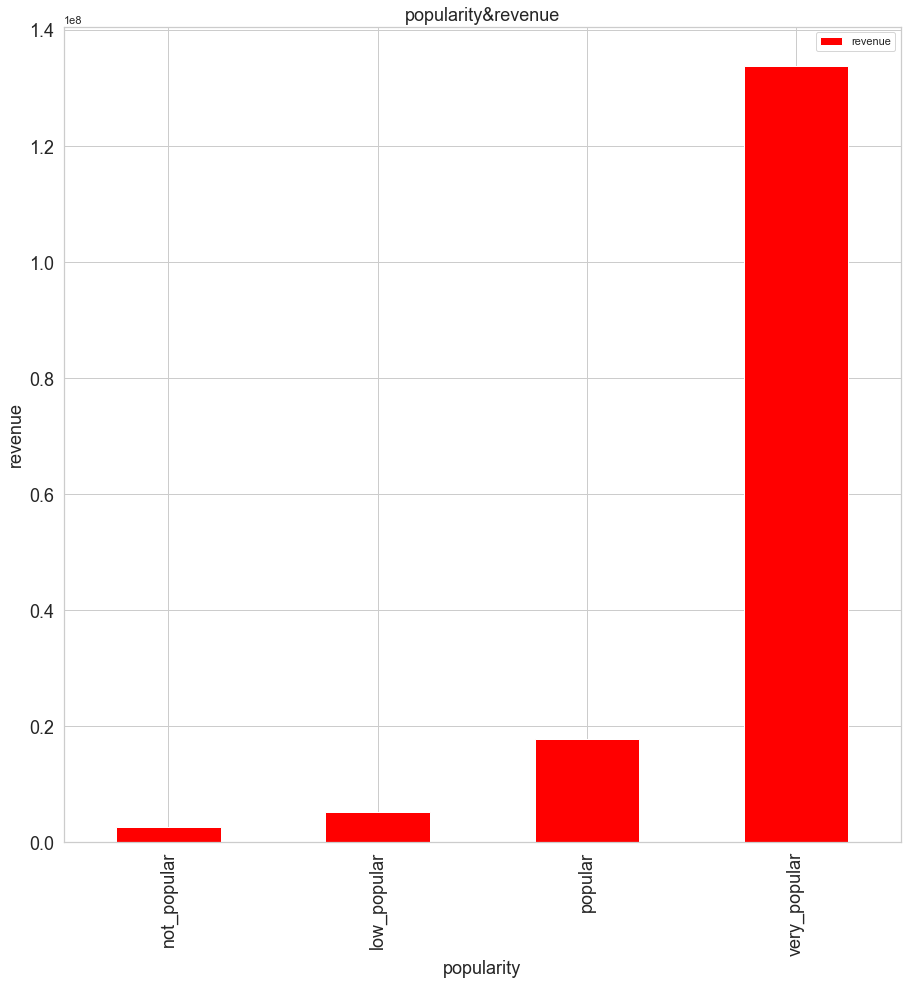

In [104]:
df.groupby('popularity_levels')['revenue'].mean().plot(kind='bar',figsize=(15,15),fontsize=18,color='red')
sns.set_theme(style="whitegrid");
plt.xlabel('popularity',fontsize=18);
plt.ylabel('revenue',fontsize=18);
plt.title('popularity&revenue',fontsize=18);
plt.legend();

<a id='conclusions'></a>
## Conclusions
#### -The dataset contain (10866) samples after i drop the columns that doesn't matter 
#### -i found the genres column contain 23 missing Values so i dropped them to be able to make relations 
#### -i didn't think those missing values affect any thing because they are less than my entire dataset

### in the first section :
>1-i tried to make a relation with numbers of genres movies through a year and  for example in 2015, i found number of drama movies released is more than any genre and no foriegn movies was released that year
>
>2-i tried to make a relation number of action movies through a year but there are no abvious relation
>
### in the next section i tried to make relation with revenue and other properties and found that :**
>
>1-the relation between **budget and revenues** is positive  , the more budget of the film , the more revenue have been get
>
>i found when the movie gets high rating, it make a high revenue
>
>2-the relation between **budget_adj and revenues_adj** is positive  , the more budget_adj of the film , the more revenue_adj have been get
>
>(**but the revenue_adj is higher in comparison with the revenue  as well as the budjet_adj is**)
>
>3-the relation between **generes_no and revenues** is positive  , the more geners of the film , the more revenue have been get
>
>4-the relation between **popularity and revenues** is positive  , the more populaity of the film , the more revenue have been get
<a id='conclusions'></a>
## limitations
>i found that there are no correlation between popularity and the released year

